In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer                          

from sklearn.compose import ColumnTransformer,make_column_transformer

from sklearn.decomposition import PCA

In [2]:
train = pd.read_csv("PJT002_train.csv", encoding = 'utf8')

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
mydata = train[['bldng_us', 'bldng_archtctr', 'bldng_cnt', 'bldng_ar', 'ttl_ar', 'lnd_ar', 'dt_of_athrztn', 'ttl_grnd_flr', 'ttl_dwn_flr', 'bldng_us_clssfctn', 'jmk','rgnl_ar_nm','rgnl_ar_nm2','lnd_us_sttn_nm','rd_sd_nm']]
mydata.head()

,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,jmk,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm
0,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,0.0,주거용,대,자연녹지지역,지정되지않음,단독,세로한면(불)
1,NaN,NaN,3,46.29,46.29,0.0,NaN,1.0,0.0,NaN,대,계획관리지역,지정되지않음,단독,세로한면(가)
2,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,2.00011e+07,5.0,0.0,주거용,답,제2종일반주거지역,지정되지않음,연립,중로한면
3,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,0.0,주거용,대,제1종일반주거지역,지정되지않음,단독,세로한면(불)
4,NaN,NaN,2,0.00,0.00,0.0,NaN,NaN,NaN,NaN,임,자연환경보전지역,지정되지않음,자연림,세로한면(불)


In [ ]:
train[''].corr()

## 1. dt_of_athrztn: 년 단위로 자르기

In [45]:
mydata['dt_of_athrztn'].unique()

array([1977.0, nan, 20001104.0, ..., 20040914.0, 19880624.0, 20120327.0],
      dtype=object)

In [46]:
import datetime
mydata['dt_of_athrztn'] = mydata['dt_of_athrztn'].astype('str')
mydata['dt_of_athrztn'] = mydata.apply(lambda x: (x['dt_of_athrztn'][:4]), axis=1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
mydata['dt_of_athrztn'].unique()

array(['1977', 'nan', '2000', '1936', '2015', '1994', '1947', '1935',
       '1992', '1930', '1980', '1952', '1997', '1943', '2010', '1971',
       '2002', '2003', '2013', '2014', '1988', '2004', '2016', '1995',
       '1989', '1925', '1951', '2008', '1999', '1934', '2009', '1993',
       '1915', '1920', '1967', '1957', '1945', '2006', '2011', '1979',
       '1984', '1955', '1991', '2005', '2007', '2018', '1998', '1976',
       '1926', '1946', '1990', '1959', '1940', '1996', '1958', '1953',
       '1965', '1970', '1972', '1960', '1982', '1954', '2012', '2017',
       '1931', '1912', '1975', '1942', '1900', '1969', '1962', '1950',
       '1939', '2001', '1961', '1983', '1974', '1985', '1973', '1987',
       '1964', '1941', '1956', '1963', '1966', '1938', '1978', '1913',
       '1923', '1949', '1986', '1933', '1901', '1944', '1890', '1968',
       '1905', '1981', '1916', '1898', '1924', '1910', '1914', '1932',
       '1850', '1948', '1927', '1937', '1917', '1904', '1878', '1921',
       

In [48]:
mydata['dt_of_athrztn'] = pd.to_numeric(mydata['dt_of_athrztn'], errors='coerce')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## 2. 결측치 비율 살펴보기

In [49]:
total = mydata.isnull().sum().sort_values(ascending=False)
percent = (mydata.isnull().sum()/mydata.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
bldng_us_clssfctn,29343,0.495667
bldng_us,27677,0.467525
bldng_archtctr,27665,0.467322
dt_of_athrztn,27581,0.465903
ttl_dwn_flr,11005,0.185898
ttl_grnd_flr,10210,0.172469
lnd_ar,0,0.000000
ttl_ar,0,0.000000
bldng_ar,0,0.000000
bldng_cnt,0,0.000000


In [7]:
print(len(train[ (train['fr_yn']=='Y') & (train['ttl_grnd_flr'].isna()) ] ) /  len(train[train['ttl_grnd_flr'].isna()]))

0.042605288932419196


Text(0.5, 1, 'Correlation with Missing Values')

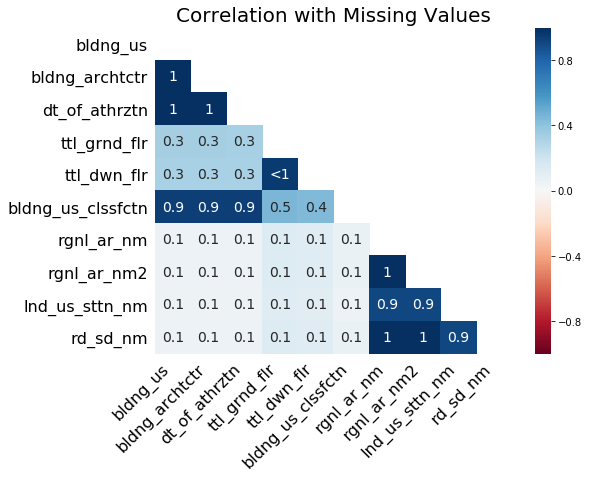

In [9]:
import missingno as msno
missingdata_df = mydata.columns[mydata.isnull().any()].tolist()
msno.heatmap(mydata[missingdata_df], figsize=(8,6))
plt.title("Correlation with Missing Values", fontsize = 20)

In [54]:
# 비누락 데이터

mydata.dropna(thresh=10)

,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn
0,단독주택,블록구조,3,69.42,69.42,0.00,1977.0,1.0,0.0,주거용
2,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.00,2000.0,5.0,0.0,주거용
3,단독주택,일반목구조,2,48.92,48.92,0.00,1936.0,1.0,0.0,주거용
5,단독주택,철근콘크리트구조,1,96.66,149.04,486.00,2015.0,2.0,0.0,주거용
7,단독주택,벽돌구조,6,92.00,92.04,0.00,1994.0,1.0,0.0,주거용
9,단독주택,일반목구조,4,66.13,66.13,0.00,1947.0,1.0,0.0,주거용
10,단독주택,일반목구조,2,98.96,98.96,310.00,1935.0,1.0,0.0,주거용
12,공동주택,철근콘크리트구조,3,1046.40,12067.38,0.00,1992.0,17.0,1.0,주거용
13,단독주택,철근콘크리트구조,1,44.22,129.55,82.00,1994.0,3.0,0.0,주거용
14,단독주택,일반목구조,4,66.12,66.12,0.00,1930.0,1.0,0.0,주거용


## 3. 층수 데이터 결측치 처리

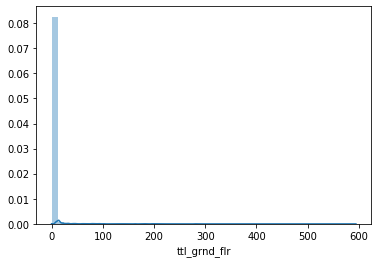

In [56]:
import seaborn as sns

sns.distplot(mydata.ttl_grnd_flr.dropna())
plt.show()

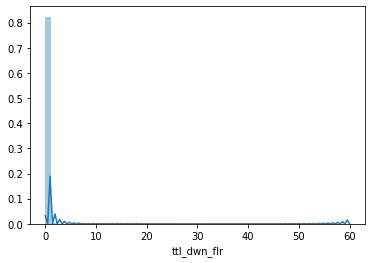

In [57]:
import seaborn as sns

sns.distplot(mydata.ttl_dwn_flr.dropna())
plt.show()